In [1]:
import pandas as pd

We first load in our annotated dataset, before separating users into groups based on labels.

In [2]:
num_topics = 100
data = pd.read_csv(f'data_with_{num_topics}.csv', sep='\t')

C:\Users\mikeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
total = data
individual = data[(data['Account Type'] == 'individual') & (data['UserType'] != 'celebrity')]
organisational = data[(data['Account Type'] == 'organisational') & (data['UserType'] != 'business')]

In [4]:
business = data[data['UserType'] == 'business']
celebrity = data[data['UserType'] == 'celebrity']

In [5]:
influential = individual[individual['Twitter Followers'] >= 3018]
core_individual = individual[individual['Twitter Followers'] < 3018]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

We then chart the monthly engagement rates for each user group.

In [13]:
def chart_engagement(df, name):
    bins = 61
    total = df
    xi = [10 * i for i in range(7)]
    x = ['05-15', '03-16', '01-17', '11-17', '09-18', '07-19','05-20']
    shares = df.loc[df['Thread Entry Type'] == 'share']
    posts = df.loc[df['Thread Entry Type'] == 'post']
    replies = df.loc[df['Thread Entry Type'] == 'reply']
    plt.title(f'{name} Engagement Type Counts by Month')
    share_counts = shares.Month.value_counts()
    share_data = np.array([share_counts.get(i, 0) for i in range(61)])
    plt.bar([_ for _ in range(61)], share_data, label='Shares')
    post_counts = posts.Month.value_counts()
    post_data = np.array([post_counts.get(i, 0) for i in range(61)])
    plt.bar([_ for _ in range(61)], post_data, bottom=share_data, label='Posts')
    reply_counts = replies.Month.value_counts()
    reply_data = np.array([reply_counts.get(i, 0) for i in range(61)])
    plt.bar([_ for _ in range(61)], reply_data, bottom=share_data + post_data, label='Replies')
    plt.xticks(xi, x)
    plt.xlabel('Date (Month-Year)')
    plt.ylabel('# of Engagements')
    plt.yscale('log', base=2)
    plt.axis([None, None, 0, 1000000])
    plt.legend()
    plt.show()

<ipython-input-13-60d4f45542ac>:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([None, None, 0, 1000000])


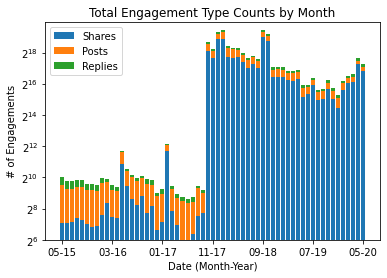

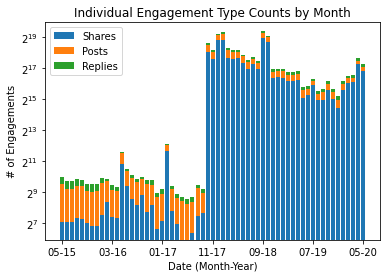

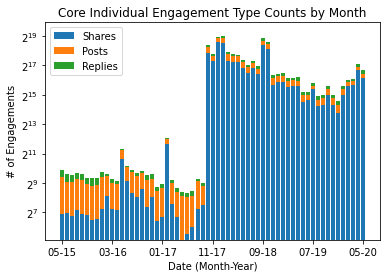

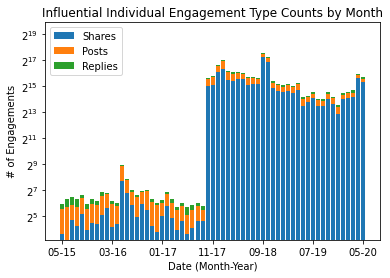

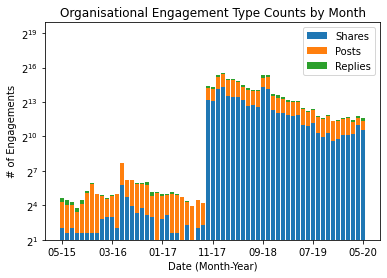

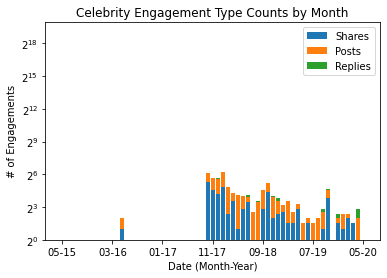

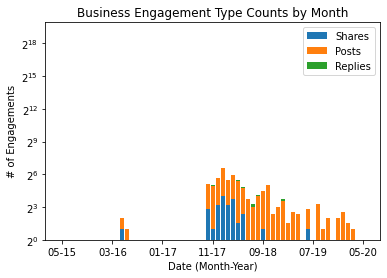

In [14]:
chart_engagement(data, 'Total')
chart_engagement(individual, 'Individual')
chart_engagement(core_individual, 'Core Individual')
chart_engagement(influential, 'Influential Individual')
chart_engagement(organisational, 'Organisational')
chart_engagement(celebrity, 'Celebrity')
chart_engagement(business, 'Business')

In [15]:
male = individual[individual['gender_inferred'] == 'male']
female = individual[individual['gender_inferred'] == 'female']

<ipython-input-13-60d4f45542ac>:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([None, None, 0, 1000000])


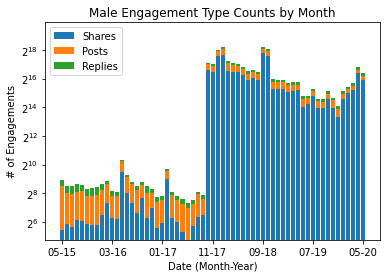

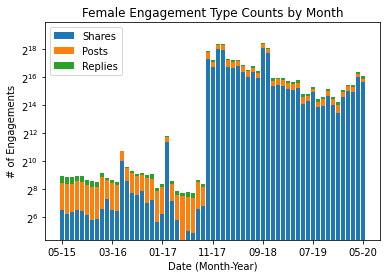

In [16]:
chart_engagement(male, 'Male')
chart_engagement(female, 'Female')

In [17]:
ethnicities = pd.unique(individual.Ethnicity.values).tolist()
ethnicities = ethnicities[2:]

<ipython-input-13-60d4f45542ac>:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([None, None, 0, 1000000])


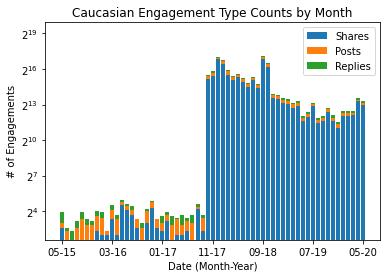

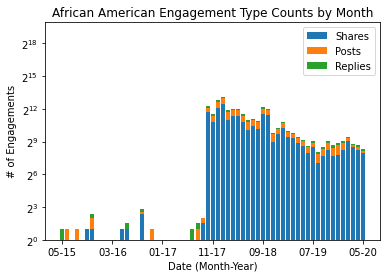

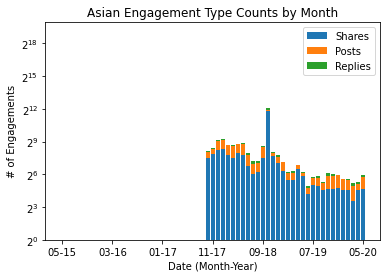

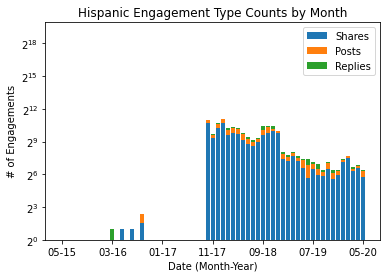

In [18]:
for eth in ethnicities:
    chart_engagement(core_individual[core_individual['Ethnicity'] == eth], eth)

In [19]:
genders = ['Male', 'Female']

<ipython-input-13-60d4f45542ac>:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([None, None, 0, 1000000])


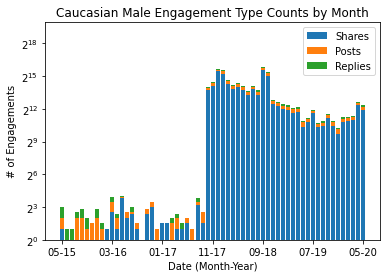

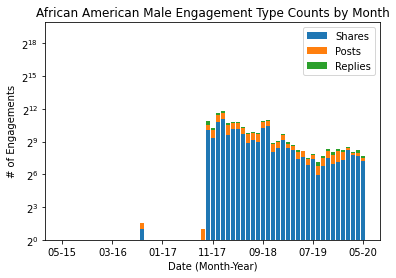

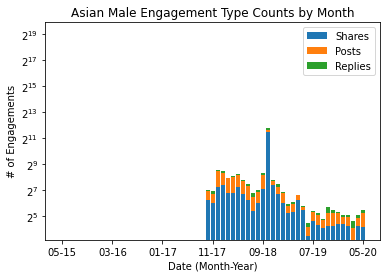

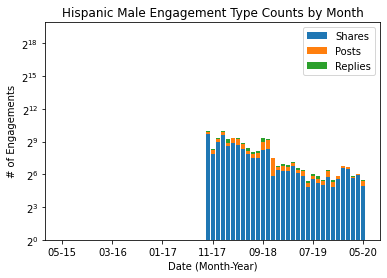

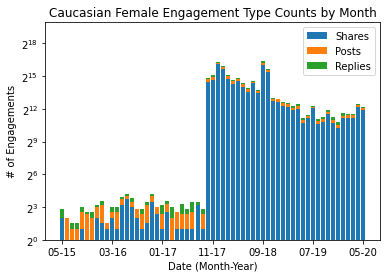

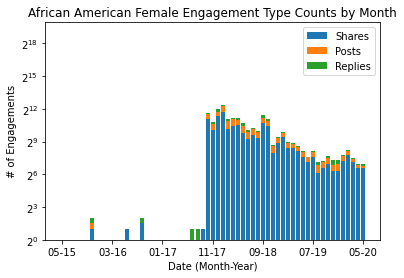

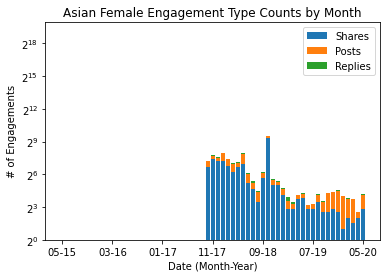

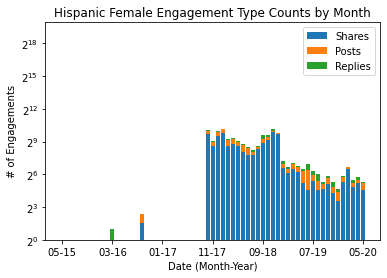

In [20]:
for g in genders:
    for eth in ethnicities:
        temp = core_individual[(core_individual['gender_inferred'] == g.lower()) & (core_individual['Ethnicity'] == eth)]
        chart_engagement(temp, f'{eth} {g}')

Next we chart the proportions of engagement types (share, post, reply) to compare various user groups.

In [32]:
def chart_engagement_proportions(series, names, title, logy=False):
    x = np.arange(3)
    plt.title(f'Engagement Type Proportions by {title}')
    x_labels = ['Shares', 'Posts', 'Replies']
    offset = .5 / len(series) 
    for i, df in enumerate(series):
        data = df['Thread Entry Type'].value_counts()
        split = names[i].split()
        label = names[i] if len(split) < 3 else ' '.join(split[:2]) + '\n' + ' '.join(split[2:])
        data = np.array([data['share'], data['post'], data['reply']]) / sum([data['share'], data['post'], data['reply']])
        plt.bar(x + offset * i, data, label = label, width=offset)
    plt.legend()
    plt.xticks(x + (offset/2 * (len(series) - 1)), x_labels)
    plt.xlabel('Engagement Type')
    plt.ylabel('% of Engagements')
    plt.ylim(0,1)
    plt.plot()
    
    

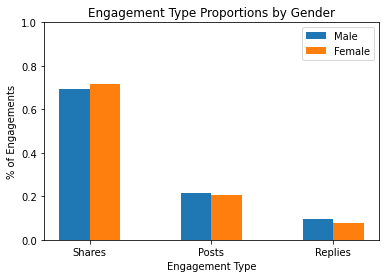

In [33]:
chart_engagement_proportions([male, female], ['Male', 'Female'], 'Gender')

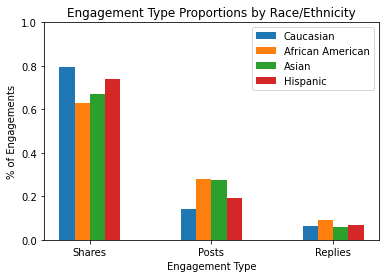

In [34]:
chart_engagement_proportions([individual[individual['Ethnicity'] == eth] for eth in ethnicities], ethnicities, 'Race/Ethnicity')

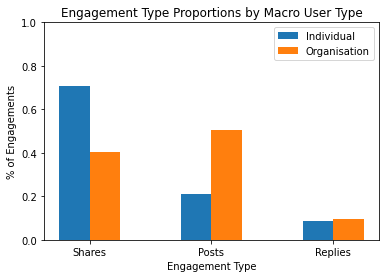

In [35]:
chart_engagement_proportions([individual, organisational], ["Individual", "Organisation"], 'Macro User Type')

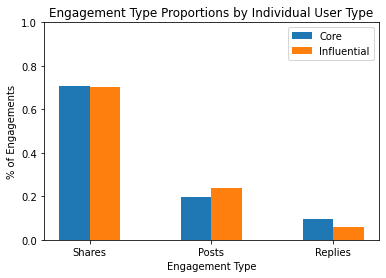

In [36]:
chart_engagement_proportions([core_individual, influential], ["Core", "Influential"], 'Individual User Type')

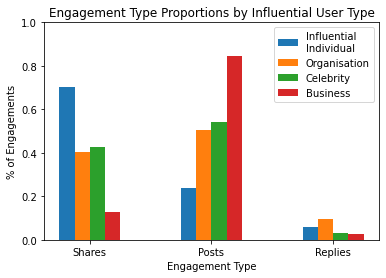

In [37]:
chart_engagement_proportions([influential, organisational, celebrity, business], ["Influential\nIndividual", "Organisation", "Celebrity", "Business"], 'Influential User Type')

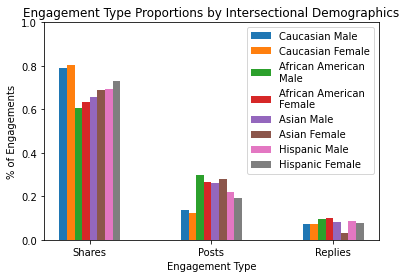

In [38]:
intersectional_groups = []
names = []
ethnicity_frames = []
for eth in ethnicities:
    ethnicity_frames.append(core_individual[core_individual['Ethnicity'] == eth])
    for g in genders:
        intersectional_groups.append(core_individual[(core_individual['gender_inferred'] == g.lower()) & (core_individual['Ethnicity'] == eth)])
        names.append(f'{eth} {g}')
chart_engagement_proportions(intersectional_groups, names, 'Intersectional Demographics')

We then generate a table with summary statistics for all of our user groups.

In [39]:
groups = ['Total', 'Core Individual', 'Influential Individual', 'Organisational', 'Celebrity', 'Business']
groups += genders
groups += ethnicities
groups += names
frames = [data, core_individual, influential, organisational, celebrity, business, male, female] + ethnicity_frames + intersectional_groups


In [40]:
group_summaries = pd.DataFrame({'Group': [], 'Unique Authors': [], 'Engagements': [], 'Posts': [], 'Shares': [], 'Replies': [], 'Avg Followers': [], 'Avg Following': [], 'Avg Impressions': []})
group_summaries['Group'] = groups
group_summaries['Avg Impressions'] = [round(f['Impressions'].mean()) for f in frames]
counts, posts, shares, replies, followers, following = [], [], [], [], [], []
for frame in frames:
    post_type_counts = frame['Thread Entry Type'].value_counts()
    posts.append(post_type_counts['post'])
    shares.append(post_type_counts['share'])
    replies.append(post_type_counts['reply'])
    counts.append(len(pd.unique(frame.Author)))
    grouped = frame.groupby('Author')
    following.append(round(grouped['Twitter Following'].mean().mean()))
    followers.append(round(grouped['Twitter Followers'].mean().mean()))

group_summaries['Unique Authors'] = counts
group_summaries['Engagements'] = [len(frame) for frame in frames]
group_summaries['Posts'] = posts
group_summaries['Shares'] = shares
group_summaries['Replies'] = replies
group_summaries['Avg Followers'] = followers
group_summaries['Avg Following'] = following
group_summaries
    


,Group,Unique Authors,Engagements,Posts,Shares,Replies,Avg Followers,Avg Following,Avg Impressions
0,Total,1385104,7173427,1646893,4907414,619120,3356,1220,19134
1,Core Individual,1242537,4967587,989191,3508998,469398,489,732,1441
2,Influential Individual,137993,1707647,406836,1197927,102884,22517,6040,40005
3,Organisational,44905,497549,250497,200233,46819,21789,1771,119117
4,Celebrity,35,567,306,243,18,7722851,8496,5322239
5,Business,45,574,486,74,14,5941736,14776,11209884
6,Male,666836,3158664,678594,2184809,295261,3103,1314,11275
7,Female,699880,3516570,717433,2522116,277021,2264,1133,11334
8,Caucasian,48029,1028338,133340,820203,74795,883,1322,1443
9,African American,5726,66184,18507,41148,6529,703,716,1668


In [41]:
total_topics = {}

for i, frame in enumerate(frames):
    topic_dist = [frame[str(j)].mean() for j in range(num_topics)]
    total_topics[groups[i]] = {'dist': topic_dist}
    

In [42]:
import torch

In [43]:
import json

Here we load in our topic words, calculate PMI for each topic, group pair, and store the top 5 most prescient topics for each group along with their top 5 key words in a table.

In [44]:
with open(f'{num_topics}-topic-words.json') as f:
    topic_words = json.load(f)

In [45]:
def calc_pmi(x, frame, group, dists):
    prob_x_and_frame = dists[group]['dist'][x]
    prob_x = dists['Total']['dist'][x]
    prob_frame = len(frame) / len(data)
    return np.log(prob_x_and_frame / (prob_x * prob_frame))

In [46]:
for i, frame in enumerate(frames):
    total_topics[groups[i]]['pmis'] = np.nan_to_num([calc_pmi(topic, frame, groups[i], total_topics) for topic in range(100)], nan=0.0)

<ipython-input-45-9ffd0c86a2be>:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.log(prob_x_and_frame / (prob_x * prob_frame))


In [47]:
for group in groups:
        total_topics[group]['pmi-top5'] = torch.topk(torch.tensor(total_topics[group]['pmis']), 5).indices

group_names = []
top_t_topics = []
key_words = []

for group in groups[1:]:
    for topic in total_topics[group]['pmi-top5']:
        group_names.append(group)
        top_t_topics.append(int(topic))
        key_words.append(' '.join(topic_words[str(int(topic))][:5]))
pmi_df = pd.DataFrame({'Group': group_names, 'Top 5 Topics': top_t_topics, 'Key Words': key_words})
pmi_df.to_csv('pmi_topics.csv', index=False)
pmi_df


,Group,Top 5 Topics,Key Words
0,Core Individual,31,im may lot started ok
1,Core Individual,32,sexually every assaulted without women
2,Core Individual,79,assault sexual speak someone male
3,Core Individual,1,right white let mean talking
4,Core Individual,42,want survivors survivor hashtag especially
...,...,...,...
90,Hispanic Female,64,victims news pain timesup trust
91,Hispanic Female,94,thank black girls happens women
92,Hispanic Female,76,tonight created equal walk patriarchy
93,Hispanic Female,48,lives feminists wave women rage


Here we calculate the pearson correlation coefficient over the monthly engagement series for each influential, non-influential group pair.

In [48]:
def calculate_engagement_correlations(standards, dfs, std_names, names):
    corr_df = pd.DataFrame({'Group': names})
    for i, standard in enumerate(standards):
        standard_series = [len(standard[standard['Month'] == j]) for j in range(61)]
        corrs = []
        for df in dfs:
            df_series = [len(df[df['Month'] == j]) for j in range(61)]
            corrs.append(np.corrcoef(standard_series, df_series)[0,1])
        corr_df[std_names[i]] = corrs
    return corr_df
        
    
        

In [49]:
eng_corr = calculate_engagement_correlations([influential, organisational, celebrity, business], [core_individual, male, female] + ethnicity_frames + intersectional_groups, ['Influential Individual', 'Organisational', 'Celebrity', 'Business'], ['Core Individual', 'Male', 'Female'] + ethnicities + names)

In [50]:
eng_corr

,Group,Influential Individual,Organisational,Celebrity,Business
0,Core Individual,0.934682,0.955098,0.869532,0.853020
1,Male,0.975191,0.957438,0.813442,0.821979
2,Female,0.944657,0.954019,0.858354,0.834844
3,Caucasian,0.928007,0.942389,0.784767,0.801646
4,African American,0.840794,0.956270,0.893338,0.943054
5,Asian,0.619389,0.582359,0.435797,0.408458
6,Hispanic,0.816051,0.924983,0.889798,0.868622
7,Caucasian Male,0.944858,0.950432,0.773958,0.802040
8,Caucasian Female,0.913726,0.934307,0.790431,0.799336
9,African American Male,0.856497,0.965084,0.878863,0.935588


Finally we calculate the pearson correlation coefficient over the monthly topic importance seires for each influential, non-influential group pair for 4 representative topics.

In [51]:
def calculate_topic_correlations(standards, dfs, col_names, names, topic):
    corr_df = pd.DataFrame({'Group': names})
    for i, standard in enumerate(standards):
        standard_series = [standard[standard['Month'] == j][str(topic)].mean() if len(standard[standard['Month'] == j]) > 0 else 0.0 for j in range(61)]
        corrs = []
        for df in dfs:
            df_series = [df[df['Month'] == j][str(topic)].mean() if len(df[df['Month'] == j]) > 0 else 0.0 for j in range(61)]
            corrs.append(np.corrcoef(standard_series, df_series)[0,1])
        corr_df[col_names[i]] = corrs
    return corr_df
        

In [52]:
topic_4_cors = calculate_topic_correlations([influential, organisational, celebrity, business], [core_individual, male, female] + ethnicity_frames + intersectional_groups, ['Influential Individual', 'Organisational', 'Celebrity', 'Business'], ['Core Individual', 'Male', 'Female'] + ethnicities + names, 4)
topic_64_cors = calculate_topic_correlations([influential, organisational, celebrity, business], [core_individual, male, female] + ethnicity_frames + intersectional_groups, ['Influential Individual', 'Organisational', 'Celebrity', 'Business'], ['Core Individual', 'Male', 'Female'] + ethnicities + names, 64)
topic_94_cors = calculate_topic_correlations([influential, organisational, celebrity, business], [core_individual, male, female] + ethnicity_frames + intersectional_groups, ['Influential Individual', 'Organisational', 'Celebrity', 'Business'], ['Core Individual', 'Male', 'Female'] + ethnicities + names, 94)
topic_81_cors = calculate_topic_correlations([influential, organisational, celebrity, business], [core_individual, male, female] + ethnicity_frames + intersectional_groups, ['Influential Individual', 'Organisational', 'Celebrity', 'Business'], ['Core Individual', 'Male', 'Female'] + ethnicities + names, 81)

In [53]:
topic_4_cors

,Group,Influential Individual,Organisational,Celebrity,Business
0,Core Individual,0.912626,0.811354,0.487898,0.502994
1,Male,0.935156,0.798037,0.461094,0.503198
2,Female,0.922922,0.830203,0.499014,0.510048
3,Caucasian,0.560541,0.663539,0.248494,0.243079
4,African American,0.191483,0.213613,0.103581,0.123665
5,Asian,0.698814,0.693500,0.580293,0.461551
6,Hispanic,0.791703,0.783412,0.450494,0.605380
7,Caucasian Male,0.451083,0.575101,0.155104,0.178731
8,Caucasian Female,0.662950,0.700723,0.348489,0.305860
9,African American Male,0.766307,0.762540,0.534162,0.530206


In [54]:
topic_64_cors

,Group,Influential Individual,Organisational,Celebrity,Business
0,Core Individual,0.759439,0.756855,0.507525,0.255230
1,Male,0.811095,0.760412,0.526869,0.266306
2,Female,0.791380,0.765272,0.496314,0.253629
3,Caucasian,0.536449,0.511594,0.366695,0.194636
4,African American,0.658373,0.731780,0.465678,0.322936
5,Asian,0.555613,0.685473,0.190971,0.279250
6,Hispanic,0.411829,0.480392,0.369998,0.357533
7,Caucasian Male,0.245432,0.223010,0.146498,0.076382
8,Caucasian Female,0.531720,0.625217,0.470492,0.251014
9,African American Male,0.580601,0.689557,0.390186,0.317530


In [55]:
topic_94_cors

,Group,Influential Individual,Organisational,Celebrity,Business
0,Core Individual,0.664831,-0.078829,0.077179,-0.056539
1,Male,0.631076,0.108700,0.081308,-0.049398
2,Female,0.740375,-0.128178,0.028331,-0.054943
3,Caucasian,0.395505,-0.163146,0.009341,-0.030094
4,African American,0.539068,-0.198319,0.160708,0.033627
5,Asian,-0.148316,-0.198990,0.431143,0.110531
6,Hispanic,0.526887,-0.198202,0.148326,0.183196
7,Caucasian Male,-0.159495,-0.225423,0.117472,0.043215
8,Caucasian Female,0.371214,-0.096305,-0.010301,-0.039447
9,African American Male,-0.193021,-0.212350,0.457421,0.119041


In [56]:
topic_81_cors

,Group,Influential Individual,Organisational,Celebrity,Business
0,Core Individual,0.642321,0.393716,0.037980,0.001260
1,Male,0.793460,0.431566,0.162968,0.037680
2,Female,0.675688,0.390305,0.037192,0.005032
3,Caucasian,0.486476,0.302422,0.075824,0.047843
4,African American,-0.068916,0.102362,0.008602,-0.005060
5,Asian,0.309029,0.292688,0.008428,0.013962
6,Hispanic,0.066761,0.031219,0.017726,0.000759
7,Caucasian Male,0.103144,0.246560,0.024237,0.018079
8,Caucasian Female,0.716171,0.254919,0.131251,0.080470
9,African American Male,0.394315,0.317070,0.206928,0.175767
